#  LAB №6-Pandas

#  The lab was fulfilled by Ivan Kozhevnyk (group K-12) , Liashko A.V.

# Variant 114

In [434]:
import pandas as pd  
import matplotlib.pyplot as plt
import matplotlib
import sys

# Versions

In [435]:
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Python version:", sys.version)

Pandas version: 2.2.2
Matplotlib version: 3.8.4
Python version: 3.12.2 (tags/v3.12.2:6abddd9, Feb  6 2024, 21:26:36) [MSC v.1937 64 bit (AMD64)]


# Period

In [436]:
P = 114 % 12 + 1
print(P)

7


# File-reading

In [437]:
weather_data = pd.read_csv('weather.csv', encoding='utf-8', names=['день', 'хмарність', 'опади', 'денна температура повітря', 'нічна температура повітря', 'сила вітру', 'період'], header=0)
weather_data

,день,хмарність,опади,денна температура повітря,нічна температура повітря,сила вітру,період
0,1,72%,-,13.5°C,6.0°C,4 м/с,2023-04
1,2,100%,1 м.м.,8.0°C,8.5°C,3 м/с,2023-04
2,3,100%,2 м.м.,6.0°C,6.0°C,4 м/с,2023-04
3,4,100%,-,5.0°C,2.0°C,3 м/с,2023-04
4,5,87%,4 м.м.,7.5°C,3.0°C,5 м/с,2023-04
...,...,...,...,...,...,...,...
360,27,64%,1 м.м.,19.5°C,13.0°C,6 м/с,2022-05
361,28,39%,-,17.0°C,10.0°C,4 м/с,2022-05
362,29,38%,-,18.5°C,10.5°C,3 м/с,2022-05
363,30,86%,4 м.м.,15.5°C,12.5°C,4 м/с,2022-05


# Converting

In [438]:
weather_data['хмарність'] = weather_data['хмарність'].str.replace('%', '').astype(int)
weather_data['опади'] = weather_data['опади'].str.replace(' м.м.', '').replace('-', '0').astype(float)
weather_data['денна температура повітря'] = weather_data['денна температура повітря'].str.replace('°C', '').astype(float)
weather_data['нічна температура повітря'] = weather_data['нічна температура повітря'].str.replace('°C', '').astype(float)
weather_data['сила вітру'] = weather_data['сила вітру'].str.replace(' м/с', '').astype(int)
weather_data['період'] = pd.to_datetime(weather_data['період'], format='%Y-%m')
weather_data['місяць'] = weather_data['період'].dt.month
weather_data.head()


,день,хмарність,опади,денна температура повітря,нічна температура повітря,сила вітру,період,місяць
0,1,72,0.0,13.5,6.0,4,2023-04-01,4
1,2,100,1.0,8.0,8.5,3,2023-04-01,4
2,3,100,2.0,6.0,6.0,4,2023-04-01,4
3,4,100,0.0,5.0,2.0,3,2023-04-01,4
4,5,87,4.0,7.5,3.0,5,2023-04-01,4


# Task 1

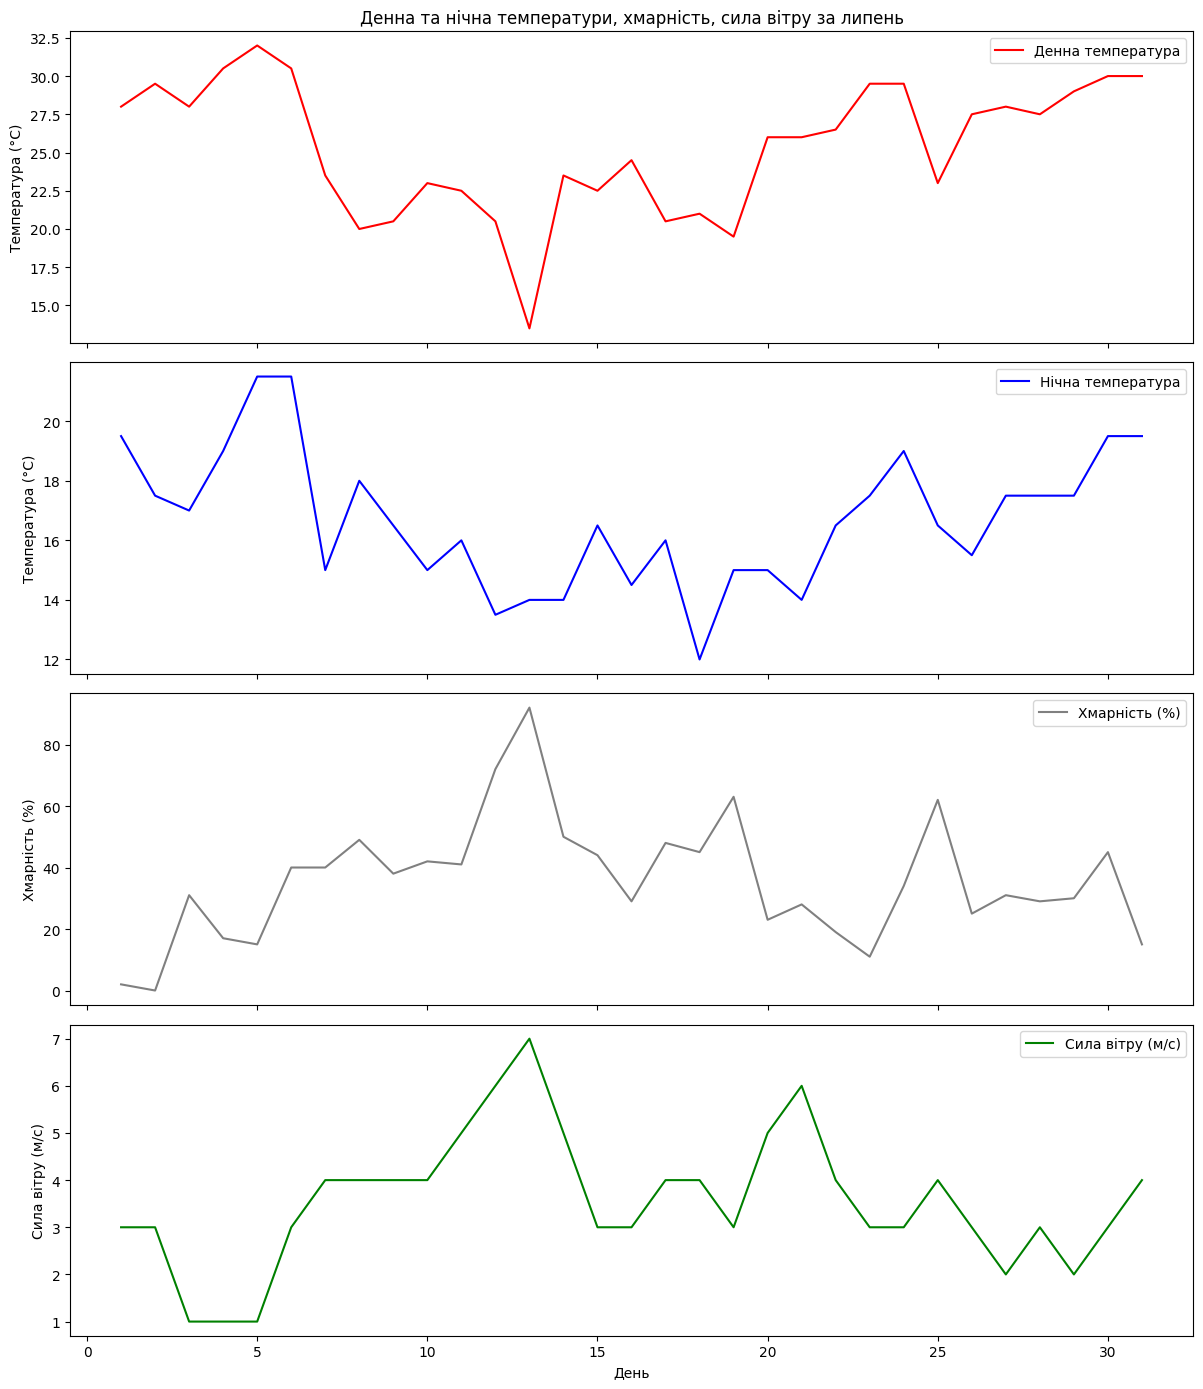

In [439]:
july_data = weather_data[weather_data['місяць'] == 7]
fig, axes = plt.subplots(4, 1, figsize=(12, 14), sharex=True)
axes[0].plot(july_data['день'], july_data['денна температура повітря'], label='Денна температура', color='red')
axes[0].set_ylabel('Температура (°C)')
axes[0].set_title('Денна та нічна температури, хмарність, сила вітру за липень')
axes[0].legend()
axes[1].plot(july_data['день'], july_data['нічна температура повітря'], label='Нічна температура', color='blue')
axes[1].set_ylabel('Температура (°C)')
axes[1].legend()
axes[2].plot(july_data['день'], july_data['хмарність'], label='Хмарність (%)', color='gray')
axes[2].set_ylabel('Хмарність (%)')
axes[2].legend()
axes[3].plot(july_data['день'], july_data['сила вітру'], label='Сила вітру (м/с)', color='green')
axes[3].set_ylabel('Сила вітру (м/с)')
axes[3].set_xlabel('День')
axes[3].legend()

plt.tight_layout()
plt.show()

# Task 2

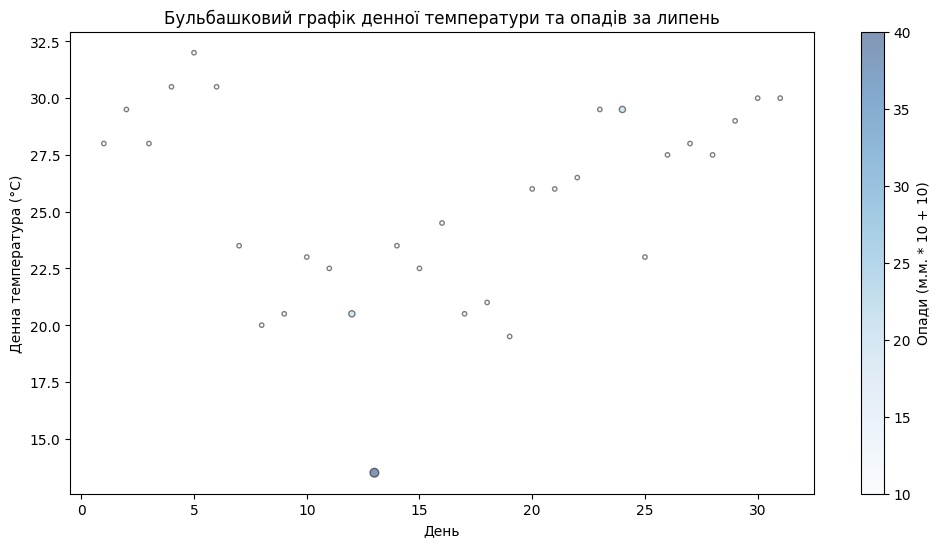

In [440]:
plt.figure(figsize=(12, 6))
bubble_sizes = july_data['опади'] * 10 + 10  
plt.scatter(july_data['день'], july_data['денна температура повітря'], s=bubble_sizes, alpha=0.5, c=bubble_sizes, cmap='Blues', edgecolor='black')
plt.title('Бульбашковий графік денної температури та опадів за липень')
plt.xlabel('День')
plt.ylabel('Денна температура (°C)')
plt.colorbar(label='Опади (м.м. * 10 + 10)')
plt.show()

# Task 3

In [441]:

weather_data['відхилення температури'] = weather_data['денна температура повітря'] - weather_data['нічна температура повітря']

average_monthly_deviation = weather_data.groupby(weather_data['період'].dt.to_period('M'))['відхилення температури'].mean()

print("Середнє місячне відхилення нічної температури від денної:")
print(average_monthly_deviation)



Середнє місячне відхилення нічної температури від денної:
період
2022-05    7.451613
2022-06    8.316667
2022-07    8.661290
2022-08    9.403226
2022-09    5.416667
2022-10    5.048387
2022-11    3.200000
2022-12    2.596774
2023-01    2.467742
2023-02    3.089286
2023-03    4.693548
2023-04    4.350000
Freq: M, Name: відхилення температури, dtype: float64


# Task 4


In [442]:
weather_data['температурне відхилення'] = abs(weather_data['денна температура повітря'] - weather_data['нічна температура повітря'])

max_deviation = weather_data['температурне відхилення'].max()

days_with_max_deviation = weather_data[weather_data['температурне відхилення'] == max_deviation].copy()

days_with_max_deviation['період'] = days_with_max_deviation['період'].dt.to_period('M')

days_with_max_deviation



,день,хмарність,опади,денна температура повітря,нічна температура повітря,сила вітру,період,місяць,відхилення температури,температурне відхилення
267,26,9,0.0,36.5,20.5,4,2022-08,8,16.0,16.0


# Task 5

In [443]:
july_data = weather_data[weather_data['період'].dt.month == 7]
top_windy_days = july_data.nlargest(4, 'сила вітру')
max_windy_day = top_windy_days.nlargest(1, 'сила вітру')

print("Чотири найбільш вітрені дні у липні:")
display(top_windy_days) 

print("\nДень з максимальною швидкістю вітру у липні:")

Чотири найбільш вітрені дні у липні:


,день,хмарність,опади,денна температура повітря,нічна температура повітря,сила вітру,період,місяць,відхилення температури,температурне відхилення
285,13,92,3.0,13.5,14.0,7,2022-07-01,7,-0.5,0.5
284,12,72,1.0,20.5,13.5,6,2022-07-01,7,7.0,7.0
293,21,28,0.0,26.0,14.0,6,2022-07-01,7,12.0,12.0
283,11,41,0.0,22.5,16.0,5,2022-07-01,7,6.5,6.5



День з максимальною швидкістю вітру у липні:


# Task 6

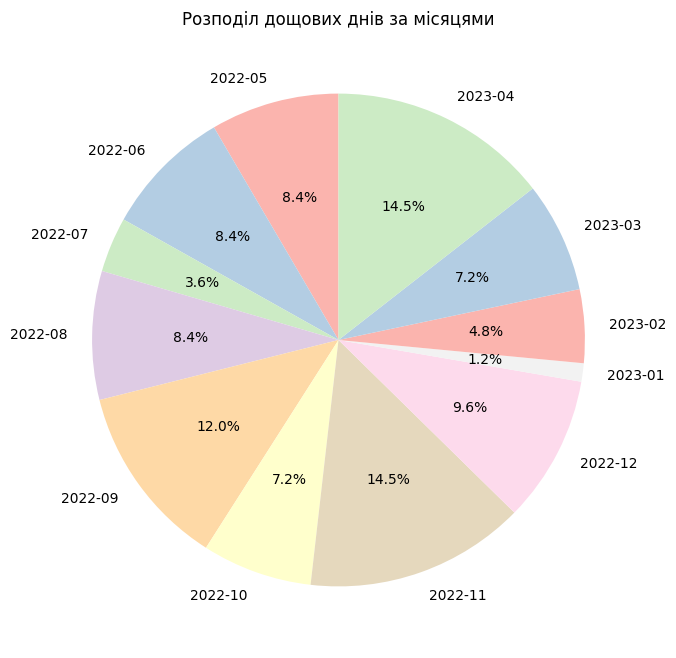

In [444]:
rainy_days = weather_data[weather_data['опади'] > 0].groupby(weather_data['період'].dt.to_period('M')).size()

plt.figure(figsize=(8, 8))
rainy_days.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors, labels=rainy_days.index.astype(str))
plt.title('Розподіл дощових днів за місяцями')
plt.ylabel('')  
plt.show()


# Task 7


<Figure size 1000x600 with 0 Axes>

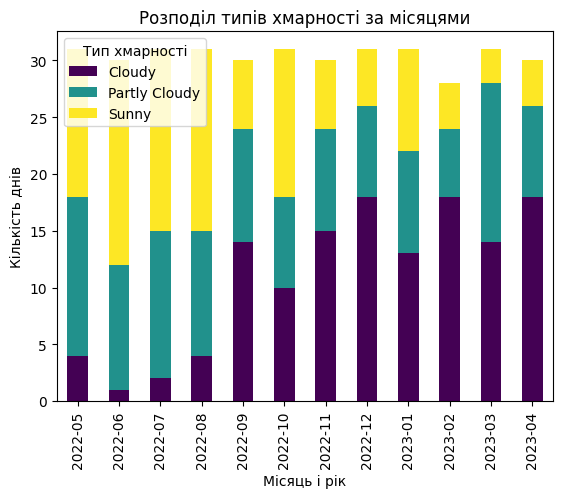

In [445]:
def classify_cloudiness(cloudiness):
    if cloudiness > 70:
        return 'Cloudy'
    elif cloudiness < 35:
        return 'Sunny'
    else:
        return 'Partly Cloudy'

weather_data['Тип хмарності'] = weather_data['хмарність'].apply(classify_cloudiness)

cloudiness_days = weather_data.groupby([weather_data['період'].dt.to_period('M'), 'Тип хмарності']).size().unstack().fillna(0)

plt.figure(figsize=(10, 6))
cloudiness_days.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Розподіл типів хмарності за місяцями')
plt.xlabel('Місяць і рік')
plt.ylabel('Кількість днів')
plt.legend(title='Тип хмарності')
plt.show()


# Task 8

In [446]:
weather_data['Sunny'] = weather_data['хмарність'] < 35
weather_data['Rainy'] = weather_data['опади'] > 0

monthly_weather = weather_data.groupby(weather_data['період'].dt.to_period('M')).agg({
    'Sunny': 'sum',
    'Rainy': 'sum'
})

sunnier_months = monthly_weather[monthly_weather['Sunny'] > monthly_weather['Rainy']]

result_df = pd.DataFrame({
    'Year-Month': sunnier_months.index.astype(str)
})
result_df.index += 1

print("Місяці, в яких було більше сонячних днів ніж днів з опадами:")
print(result_df)




Місяці, в яких було більше сонячних днів ніж днів з опадами:
  Year-Month
1    2022-05
2    2022-06
3    2022-07
4    2022-08
5    2022-10
6    2023-01


# Task 9

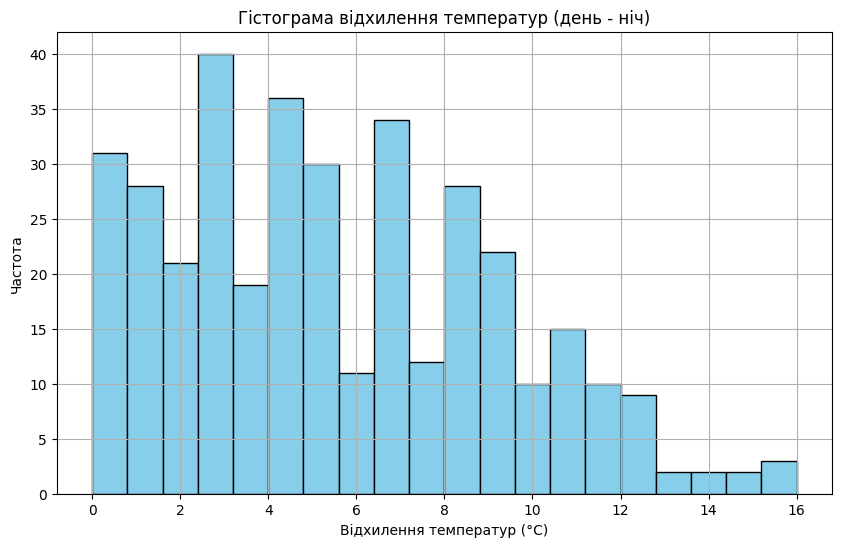

In [447]:
sunny_days = weather_data[weather_data['Тип хмарності'] == 'Sunny'].groupby('місяць').size()

plt.figure(figsize=(10, 6))
weather_data['температурне відхилення'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Гістограма відхилення температур (день - ніч)')
plt.xlabel('Відхилення температур (°C)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

